# 数値データに対する前処理コード例
- ref.
    - preprocess methods
        - [機械学習のための特徴量エンジニアリング](https://www.oreilly.co.jp/books/9784873118680/)
        - [5.3. Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)
    - data: [YouTuberデータセット公開してみた](https://qiita.com/myaun/items/7e0dd7f3f9d9d2fef497)
- 全体の流れ
    - データセットの準備。
    - 数値データに対する前処理の例
        - 手法1：バイナリ化
        - 手法2：アドホックな離散化
        - 手法3：統計的な離散化
        - 手法4：ログスケール化
            - デフォルトとログスケールとの比較
        - 手法5：標準化
        - 手法6：min-maxスケーリング
    - 特徴ベクトルに対する前処理の例
        - 手法7：正規化
        - 手法8：正規分布への写像
            - デフォルトとbox-cox写像との比較

## 環境構築

In [ ]:
!pip install quilt
!quilt install haradai1262/YouTuber

     |████████████████████████████████| 110 kB 29.4 MB/s 
100% 633M/633M [00:25<00:00, 25.0MB/s]


## データセットの準備

In [ ]:
from quilt.data.haradai1262 import YouTuber
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#df = YouTuber.channels.UUUM()
df = YouTuber.channel_videos.UUUM_videos()

# check the descriptive statistics of numerical data
df.describe()

,viewCount,likeCount,favoriteCount,dislikeCount,commentCount,TopicIds,idx
count,6.627900e+04,64256.000000,66289.0,64256.000000,65997.000000,0.0,66289.000000
mean,4.545539e+05,3233.703390,0.0,296.430014,533.418807,NaN,235.730136
std,1.328105e+06,9768.090605,0.0,1633.734833,2253.437482,NaN,142.868881
min,0.000000e+00,0.000000,0.0,0.000000,0.000000,NaN,1.000000
25%,3.907100e+04,266.000000,0.0,23.000000,55.000000,NaN,111.000000
50%,1.214190e+05,776.000000,0.0,67.000000,150.000000,NaN,229.000000
75%,3.512260e+05,2260.000000,0.0,201.000000,394.000000,NaN,357.000000
max,8.664236e+07,630051.000000,0.0,213677.000000,227598.000000,NaN,501.000000


In [ ]:
# the description of data frame
df.head()

,id,title,description,liveBroadcastContent,tags,publishedAt,thumbnails,viewCount,likeCount,favoriteCount,...,commentCount,caption,definition,dimension,duration,projection,TopicIds,relevantTopicIds,idx,cid
0,R7V5d94XkGQ,"【大食い】超高級寿司店で３人で食べ放題したらいくらかかるの!?【大トロ1カン2,000円】",提供：ポコロンダンジョンズ\r\r\r\r\niOS：https://bit.ly/2sGg...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-30T04:00:01.000Z,https://i.ytimg.com/vi/R7V5d94XkGQ/default.jpg,2244205.0,27703.0,0,...,8647.0,False,hd,2d,PT21M16S,rectangular,NaN,"['/m/02wbm', '/m/019_rr', '/m/019_rr', '/m/02w...",1,UCZf__ehlCEBPop___sldpBUQ
1,2R9_bkcWNd4,【女王集結】女性YouTuberたちと飲みながら本音トークしてみたら爆笑www,しばなんチャンネルの動画\r\r\r\r\nhttps://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-29T08:00:01.000Z,https://i.ytimg.com/vi/2R9_bkcWNd4/default.jpg,1869268.0,30889.0,0,...,8859.0,False,hd,2d,PT18M38S,rectangular,NaN,"['/m/04rlf', '/m/02jjt', '/m/02jjt']",2,UCZf__ehlCEBPop___sldpBUQ
2,EU8S-zxS9PI,【悪質】偽物ヒカキン許さねぇ…注意してください！【なりすまし】,◆チャンネル登録はこちら↓\r\r\r\r\nhttp://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-27T08:38:55.000Z,https://i.ytimg.com/vi/EU8S-zxS9PI/default.jpg,1724625.0,33038.0,0,...,11504.0,False,hd,2d,PT6M12S,rectangular,NaN,"['/m/04rlf', '/m/02jjt', '/m/02jjt']",3,UCZf__ehlCEBPop___sldpBUQ
3,5wnfkIfw0jE,ツイッターのヒカキンシンメトリーBotが面白すぎて爆笑www,◆チャンネル登録はこちら↓\r\r\r\r\nhttp://www.youtube.com/...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-25T07:46:07.000Z,https://i.ytimg.com/vi/5wnfkIfw0jE/default.jpg,1109029.0,25986.0,0,...,6852.0,False,hd,2d,PT6M31S,rectangular,NaN,"['/m/04rlf', '/m/02jjt', '/m/02jjt']",4,UCZf__ehlCEBPop___sldpBUQ
4,-6duBsde_XM,【放送事故】酒飲みながら東海オンエア×ヒカキンで質問コーナーやったらヤバかったwww,提供：モンスターストライク\r\r\r\r\n▼キャンペーンサイトはこちら\r\r\r\r\...,none,"['ヒカキン', 'ヒカキンtv', 'hikakintv', 'hikakin', 'ひか...",2018-06-21T08:00:00.000Z,https://i.ytimg.com/vi/-6duBsde_XM/default.jpg,1759797.0,33923.0,0,...,4517.0,False,hd,2d,PT27M7S,rectangular,NaN,"['/m/098wr', '/m/019_rr', '/m/02wbm', '/m/019_...",5,UCZf__ehlCEBPop___sldpBUQ


In [ ]:
# column 'viewCount''
df['viewCount'].sort_values()

24466    0.0
45995    0.0
45994    0.0
65508    0.0
45993    0.0
        ... 
45854    NaN
45856    NaN
45860    NaN
45864    NaN
45865    NaN
Name: viewCount, Length: 66289, dtype: float64

In [ ]:
# drop samples including NaN & 0 on 'viewCount'

print('orig_num = ', len(df))
print('num of NaN = ', len(df.query('viewCount == "NaN"')))
df = df[df['viewCount'].notnull()]
print('after_num = ', len(df))

df = df[df['viewCount'] != 0]
print('after_num2 = ', len(df))

orig_num =  66289
num of NaN =  0
after_num =  66279
after_num2 =  66231


In [ ]:
df['viewCount'].describe()

count    6.623100e+04
mean     4.548834e+05
std      1.328530e+06
min      2.000000e+00
25%      3.919150e+04
50%      1.215850e+05
75%      3.515195e+05
max      8.664236e+07
Name: viewCount, dtype: float64

Text(0, 0.5, 'Frequency (log)')

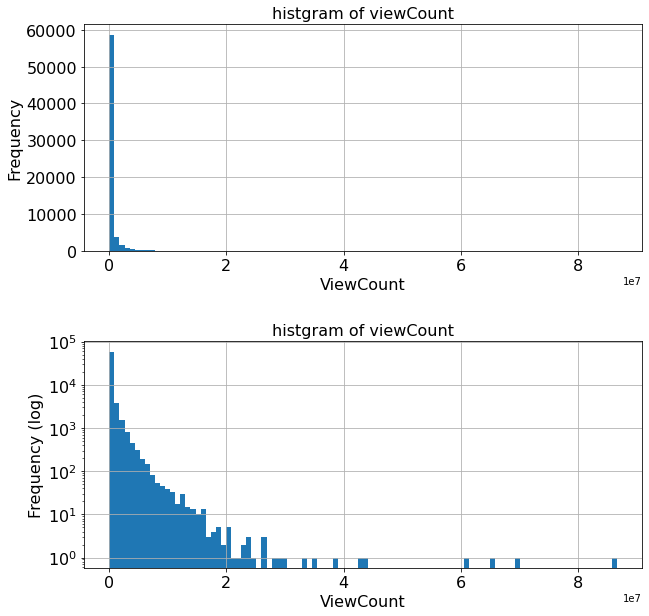

In [ ]:
# histgram of viewCount

%matplotlib inline
fontsize = 16

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
df['viewCount'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('histgram of viewCount', fontsize=fontsize)
ax1.set_xlabel('ViewCount', fontsize=fontsize)
ax1.set_ylabel('Frequency', fontsize=fontsize)

# log
df['viewCount'].hist(ax=ax2, bins=100, log=True)
ax2.tick_params(labelsize=fontsize)
ax2.set_title('histgram of viewCount', fontsize=fontsize)
ax2.set_xlabel('ViewCount', fontsize=fontsize)
ax2.set_ylabel('Frequency (log)', fontsize=fontsize)

## 数値データに対する前処理の例

### 手法1：バイナリ化(binarization)

In [ ]:
# preprocess method 1: binarization by mean value

THRESHOLD = df['viewCount'].mean()
new_column = df['viewCount'] > THRESHOLD
new_column = np.where(new_column == True, 1, 0)
temp = pd.DataFrame(df['viewCount'])
temp['binary'] = new_column
temp.head()

,viewCount,binary
0,2244205.0,1
1,1869268.0,1
2,1724625.0,1
3,1109029.0,1
4,1759797.0,1


### 手法2：アドホックな離散化(ad-hoc discretization)

In [ ]:
# preprocess method 2: discretization 1, ad-hoc division
floor = 10000
new_column = np.floor_divide(df['viewCount'], floor)
temp['discret_floor'] = new_column
temp.head()

,viewCount,binary,discret_floor
0,2244205.0,1,224.0
1,1869268.0,1,186.0
2,1724625.0,1,172.0
3,1109029.0,1,110.0
4,1759797.0,1,175.0


Text(0, 0.5, 'Freqency (log)')

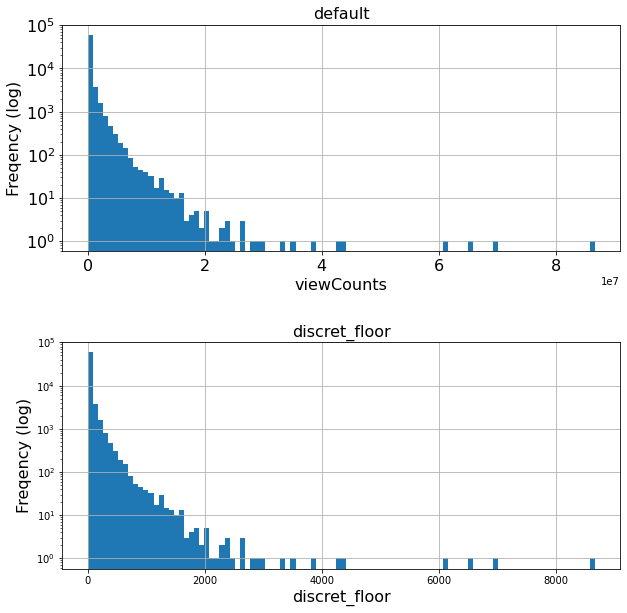

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100, log=True)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency (log)', fontsize=fontsize)

# discret_floor
temp['discret_floor'].hist(ax=ax2, bins=100, log=True)
ax2.set_title('discret_floor', fontsize=fontsize)
ax2.set_xlabel('discret_floor', fontsize=fontsize)
ax2.set_ylabel('Freqency (log)', fontsize=fontsize)

### 手法3：統計的な離散化

In [ ]:
# preprocess method 3: discretization 2, quantilzation
discret_num = 4
ranges = np.linspace(0, 1, discret_num)
data = df['viewCount'].quantile(ranges)
data

0.000000    2.000000e+00
0.333333    5.913133e+04
0.666667    2.408843e+05
1.000000    8.664236e+07
Name: viewCount, dtype: float64

In [ ]:
new_column = pd.qcut(df['viewCount'], discret_num, labels=False)
temp['discret_quantile'] = new_column
temp

,viewCount,binary,discret_floor,discret_quantile
0,2244205.0,1,224.0,3
1,1869268.0,1,186.0,3
2,1724625.0,1,172.0,3
3,1109029.0,1,110.0,3
4,1759797.0,1,175.0,3
...,...,...,...,...
66284,131489.0,0,13.0,2
66285,13271.0,0,1.0,0
66286,76266.0,0,7.0,1
66287,282447.0,0,28.0,2


Text(0, 0.5, 'Freqency (log)')

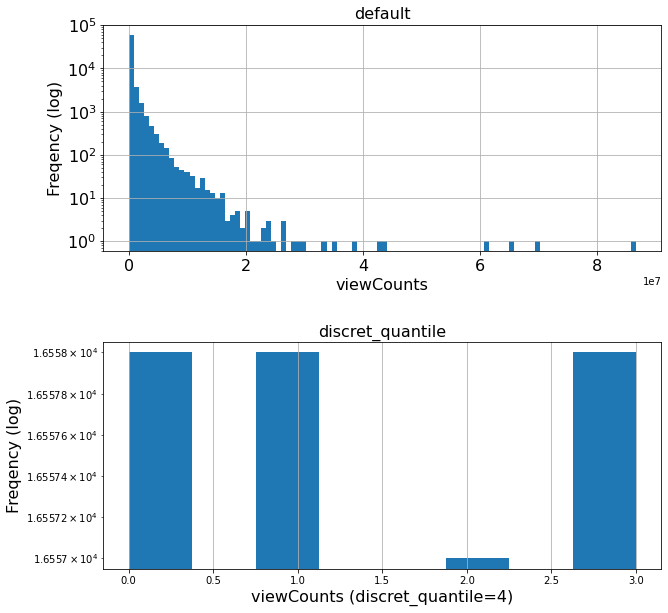

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100, log=True)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency (log)', fontsize=fontsize)

# discret_quantile
bins = discret_num*2
temp['discret_quantile'].hist(ax=ax2, bins=bins, log=True)
ax2.set_title('discret_quantile', fontsize=fontsize)
ax2.set_xlabel('viewCounts (discret_quantile={})'.format(discret_num), fontsize=fontsize)
ax2.set_ylabel('Freqency (log)', fontsize=fontsize)

### 手法4：ログスケール化(log-scaling)

In [ ]:
# preprocess method 4: log-scaling
new_column = np.log10(df['viewCount'] + 1)
temp['log10'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10
0,2244205.0,1,224.0,3,6.351063
1,1869268.0,1,186.0,3,6.271672
2,1724625.0,1,172.0,3,6.236695
3,1109029.0,1,110.0,3,6.044943
4,1759797.0,1,175.0,3,6.245463


### デフォルトとログスケールとの比較

Text(0, 0.5, 'Freqency')

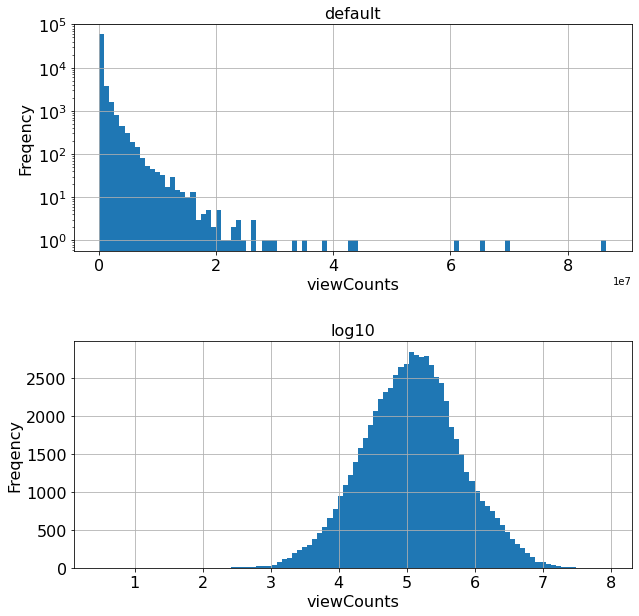

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100, log=True)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency', fontsize=fontsize)

# log-scaled
temp['log10'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=fontsize)
ax2.set_title('log10', fontsize=fontsize)
ax2.set_xlabel('viewCounts', fontsize=fontsize)
ax2.set_ylabel('Freqency', fontsize=fontsize)


### 手法5：標準化(standardization)
- [5.3.1. Standardization, or mean removal and variance scaling](https://scikit-learn.org/stable/modules/preprocessing.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [ ]:
from sklearn import preprocessing

data = np.array(df['viewCount'].values, dtype='float64')
data = data.reshape(len(data), 1)
new_column = preprocessing.scale(data)
temp['standardization'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization
0,2244205.0,1,224.0,3,6.351063,1.346854
1,1869268.0,1,186.0,3,6.271672,1.064632
2,1724625.0,1,172.0,3,6.236695,0.955757
3,1109029.0,1,110.0,3,6.044943,0.492387
4,1759797.0,1,175.0,3,6.245463,0.982231


In [ ]:
mean = np.mean(new_column)
var = np.var(new_column)
print('mean = ', mean, ', var = ', var)

temp['standardization'].describe()


mean =  1.2873900181367037e-17 , var =  1.0


count    6.623100e+04
mean     8.899653e-16
std      1.000008e+00
min     -3.423971e-01
25%     -3.128985e-01
50%     -2.508795e-01
75%     -7.780379e-02
max      6.487481e+01
Name: standardization, dtype: float64

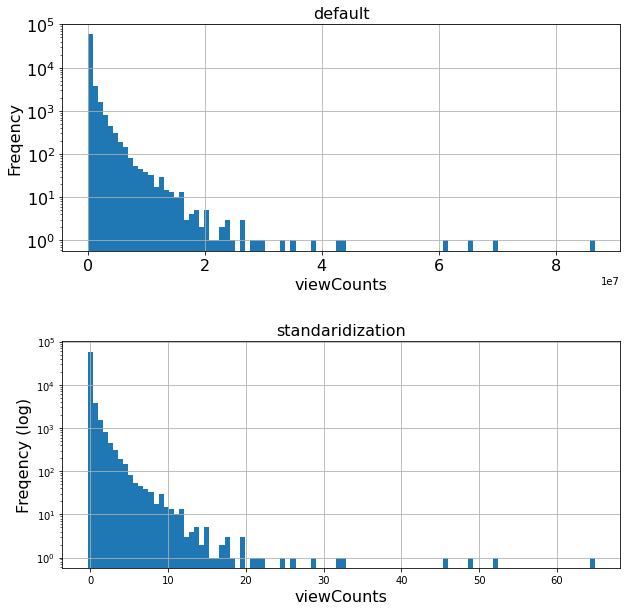

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100, log=True)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency', fontsize=fontsize)

# log-scaled
ax2.set_title('standaridization', fontsize=fontsize)
ax2.set_xlabel('viewCounts', fontsize=fontsize)
ax2.set_ylabel('Freqency (log)', fontsize=fontsize)
temp['standardization'].hist(ax=ax2, bins=100, log=True)
#plt.hist(temp['standardization'], bins=100, log=True)

### 手法6：min-maxスケーリング(Min-Max scalering)
- [min-max scaler](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)

In [ ]:
"""
min = data.min(axis=0)
max = data.max(axis=0)
new_column = (data - min) / (max - min)
temp['min-max'] = new_column
temp.head()
"""

new_column = preprocessing.minmax_scale(df['viewCount'])
temp['min-max'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max
0,2244205.0,1,224.0,3,6.351063,1.346854,0.025902
1,1869268.0,1,186.0,3,6.271672,1.064632,0.021575
2,1724625.0,1,172.0,3,6.236695,0.955757,0.019905
3,1109029.0,1,110.0,3,6.044943,0.492387,0.012800
4,1759797.0,1,175.0,3,6.245463,0.982231,0.020311


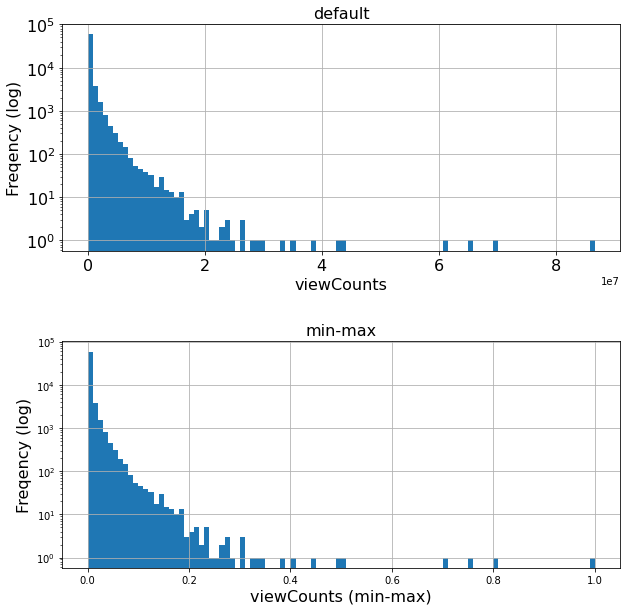

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100, log=True)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency (log)', fontsize=fontsize)

# min-max
ax2.set_title('min-max', fontsize=fontsize)
ax2.set_xlabel('viewCounts (min-max)', fontsize=fontsize)
ax2.set_ylabel('Freqency (log)', fontsize=fontsize)
temp['min-max'].hist(ax=ax2, bins=100, log=True)


## 特徴ベクトルに対する前処理の例

### 手法7：正規化(normalization)
- 正規化という考え方自体は特徴量（データセットを表と見た時の列）に対しても適用できる。ここでは特徴ベクトル（行）に対して適用した際の値を観察する。
- NOTE: the process target is NOT one feature value (one column). **The target of normalization is "feature vector (one row)"**.
- [5.3.3. Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

In [ ]:
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max
0,2244205.0,1,224.0,3,6.351063,1.346854,0.025902
1,1869268.0,1,186.0,3,6.271672,1.064632,0.021575
2,1724625.0,1,172.0,3,6.236695,0.955757,0.019905
3,1109029.0,1,110.0,3,6.044943,0.492387,0.012800
4,1759797.0,1,175.0,3,6.245463,0.982231,0.020311


In [ ]:
normalized_l2 = preprocessing.normalize(temp, norm='l2')
normalized_l2 = pd.DataFrame(normalized_l2, columns=temp.columns)
normalized_l2.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max
0,1.0,4.455921e-07,0.000100,0.000001,0.000003,6.001473e-07,1.154169e-08
1,1.0,5.349688e-07,0.000100,0.000002,0.000003,5.695449e-07,1.154169e-08
2,1.0,5.798362e-07,0.000100,0.000002,0.000004,5.541823e-07,1.154169e-08
3,1.0,9.016897e-07,0.000099,0.000003,0.000005,4.439801e-07,1.154168e-08
4,1.0,5.682474e-07,0.000099,0.000002,0.000004,5.581503e-07,1.154169e-08


In [ ]:
sum = 0
for item in normalized_l2.values[0]:
    sum += item ** 2
print('L2 norm = ', sum)

L2 norm =  0.9999999999999999


### 手法8：正規分布への写像(Mapping to a Gaussian distribution)
- [Mapping to a Gaussian distribution](https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-gaussian-distribution)

In [ ]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
orig = df['viewCount'].values.reshape(-1,1)
new_column = pt.fit_transform(orig)
temp['box-cox'] = new_column
temp.head()

,viewCount,binary,discret_floor,discret_quantile,log10,standardization,min-max,box-cox
0,2244205.0,1,224.0,3,6.351063,1.346854,0.025902,15.286494
1,1869268.0,1,186.0,3,6.271672,1.064632,0.021575,15.086987
2,1724625.0,1,172.0,3,6.236695,0.955757,0.019905,14.999160
3,1109029.0,1,110.0,3,6.044943,0.492387,0.012800,14.518429
4,1759797.0,1,175.0,3,6.245463,0.982231,0.020311,15.021172


### デフォルトとBox-Cox写像との比較

Text(0, 0.5, 'Freqency')

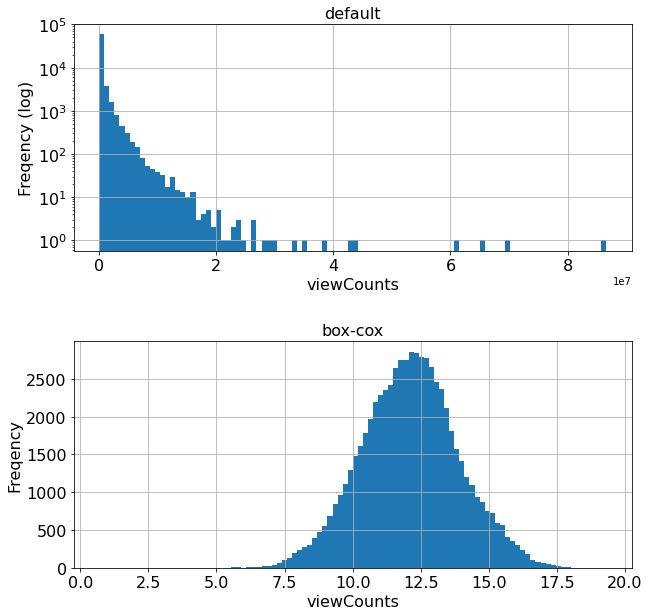

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.4)

# default values
temp['viewCount'].hist(ax=ax1, bins=100, log=True)
ax1.tick_params(labelsize=fontsize)
ax1.set_title('default', fontsize=fontsize)
ax1.set_xlabel('viewCounts', fontsize=fontsize)
ax1.set_ylabel('Freqency (log)', fontsize=fontsize)

# box-cox
temp['box-cox'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=fontsize)
ax2.set_title('box-cox', fontsize=fontsize)
ax2.set_xlabel('viewCounts', fontsize=fontsize)
ax2.set_ylabel('Freqency', fontsize=fontsize)

Text(0, 0.5, 'Freqency')

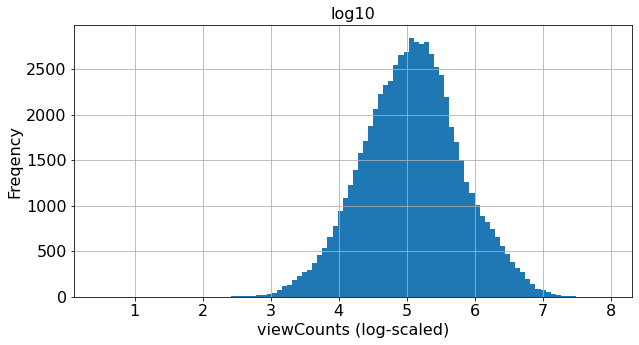

In [ ]:
# 似ている分布、log-scaledとの比較

fig, ax = plt.subplots(figsize=(10,5))

# log-scaled
temp['log10'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=fontsize)
ax.set_title('log10', fontsize=fontsize)
ax.set_xlabel('viewCounts (log-scaled)', fontsize=fontsize)
ax.set_ylabel('Freqency', fontsize=fontsize)


## 演習
1. dislikeCountの出現頻度をヒストグラムとして描画してみよう。数値はそのまま用いるものとする。ビン数は50とすること。
1. 1のヒストグラムにおいて、ビン数を10〜100の間で変更し、描画されるグラフへの影響を確認してみよう。
1. 1のヒストグラムにおいて、カウント数をlogスケールで描画してみよう。
1. 1のヒストグラムにおいて、カウント数を標準化して描画してみよう。
1. 1のヒストグラムにおいて、カウント数をBox-Cox写像して描画してみよう。
1. 前処理なし、logスケール、標準化、Box-Cox写像、各々によるヒストグラム上の違いを確認してみよう。